In [1]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


In [10]:
model = load_model('lenet.h5')

In [11]:
def returndigit(path):
    img =cv2.imread(path,0)
    invereted_img = img
    invereted_img = invereted_img.astype('float32')
    invereted_img /= 255
    imgheight, imgwidth = invereted_img.shape
    old_i = 0
    finalnumber = []
    for i in range(0,imgwidth-1):
        count = 0
        for j in range(0,imgheight):
            if invereted_img[j][i] == 0:
                count +=1
                
            if count == imgheight:
                croppedimg = invereted_img[:,old_i:i+1]
                croppedwidth = croppedimg.shape[1]
                old_i = i
                if croppedwidth <= 28 and croppedwidth >= 5:
                    remaining = 28-croppedwidth
                    remaining1 = int(remaining/2)
                    remaining2 = remaining - remaining1
                    croppedimg = np.concatenate((np.zeros((28, remaining1),np.uint8),croppedimg, np.zeros((28, remaining2),np.uint8)),axis=1)
                    croppedimg = croppedimg.reshape(1,croppedimg.shape[0],croppedimg.shape[1],1)
                    pred = model.predict(croppedimg).tolist()[0]
                    finalnumber.append(pred.index(max(pred)))
    return finalnumber



In [56]:
def datesegmentation(path):
    img =cv2.imread(path,0)
    invereted_img = 255-img
    invereted_img = invereted_img.astype('float32')
    invereted_img /= 255
    imgheight, imgwidth = invereted_img.shape
    old_i =0

    seq_space = 0
    wordcount = 0
    for i in range(0,imgwidth-1):
        count = 0
        for j in range(0,imgheight):
            if invereted_img[j][i] == 0:
                count +=1
                if count == imgheight:
                    seq_space +=1 
                    if  seq_space >= 3:
                        seq_space = 0
                        croppedimg = invereted_img[:,old_i:i+1]
                        croppedwidth = croppedimg.shape[1]  
                        if croppedwidth >=56:
                            if wordcount == 0:
                                cv2.imwrite('/media/windows-share/' +'date'+'.png',croppedimg*255)
                                date_return = returndigit('/media/windows-share/' +'date'+'.png')
                            elif wordcount ==1:
                                cv2.imwrite('/media/windows-share/' +'mon'+'.png',croppedimg*255)                              
                            else:
                                croppedimg = invereted_img[:,old_i:]
                                cv2.imwrite('/media/windows-share/' +'year'+'.png',croppedimg*255)
                                year_return = returndigit('/media/windows-share/' +'year'+'.png')
                                break
                            wordcount += 1    
                            old_i = i           

            else:
                seq_space = 0  


    return [date_return, year_return]

In [57]:
path = '/media/windows-share/date_103.png'
a = datesegmentation(path)
a

[[0, 6], [2, 0, 1, 6]]

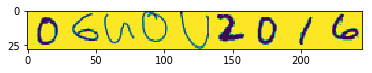

In [55]:
plt.imshow(cv2.imread(path,0))